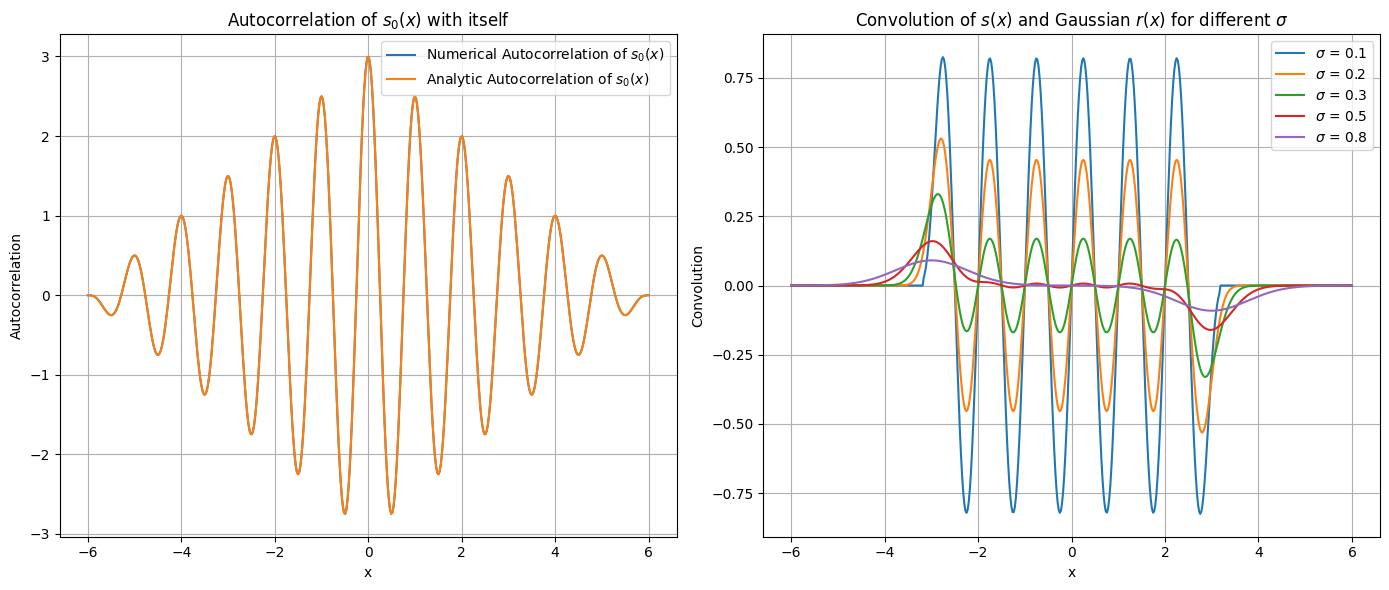

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def s0(x):
    return np.where((-3 <= x) & (x <= 3), np.sin(2 * np.pi * x), 0)

def p(x):
    return np.where((-3 <= x) & (x <= 3), np.sin(20 * np.pi * x), 0)

def s(x):
    return s0(x) + p(x)

def gaussian(x, sigma=0.2):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x**2 / (2 * sigma**2))

# 1. Calculate the cross correlation
x_values = np.linspace(-6, 6, 500)
autocorrelation = []

for x in x_values:
    integral, _ = quad(lambda y: s0(y) * s0(y + x), -3, 3)
    autocorrelation.append(integral)

def cross_correlation(x):
    return 0.5 * np.cos(2 * np.pi * x) * (6 - abs(x)) + np.sin(2 * np.pi * abs(x))/(4 * np.pi)
    
# 2. Calculate the convolution
y_values = np.linspace(-6, 6, 500)
s_values = [s(y) for y in y_values]
sigmas = [0.1, 0.2, 0.3, 0.5, 0.8]
convolutions = {}
for i, sigma in enumerate(sigmas):
    convolution_values = []
    r_func = lambda x: gaussian(x, sigma)
    for y in y_values:
        # Define the integrand for convolution
        integrand = lambda t: s(t) * r_func(y - t)
        # Compute the integral over t from -6 to 6
        integral, _ = quad(integrand, -6, 6)
        convolution_values.append(integral)
    convolutions[i] = convolution_values

plt.figure(figsize=(14, 6))
# 1. Calculate the cross correlation
plt.subplot(1, 2, 1)
plt.plot(x_values, autocorrelation, label='Numerical Autocorrelation of $s_0(x)$')
plt.plot(x_values, cross_correlation(x_values), label='Analytic Autocorrelation of $s_0(x)$')
plt.xlabel('x')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of $s_0(x)$ with itself')
plt.grid(True)
plt.legend()

# 2. Calculate the convolution
plt.subplot(1, 2, 2)
for i, sigma in enumerate(sigmas):
    plt.plot(y_values, convolutions[i], label=f'$\sigma$ = {sigma}')
plt.xlabel('x')
plt.ylabel('Convolution')
plt.title('Convolution of $s(x)$ and Gaussian $r(x)$ for different $\sigma$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()